<a href="https://colab.research.google.com/github/ChiaraSolito/ComputerVisionProject/blob/main/YOLOv5_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv5

## Preparing for training
We clone the repo and install requirements.txt in a Python>=3.8.0 environment, including PyTorch>=1.8. Models and datasets download automatically from the latest YOLOv5 release.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


##Dataset
We uploaded the dataset in the folder Tiny_PlasticBottles on the drive. In choosing the dataset we thought about choosing a case that could be helpfull in a real life situation: combating plastic waste and pollution. This dataset offers a collection of diverse images. The dataset is taken from roboflow and comprises a total of 338 images, each annotated using the YOLOv5 standard.

## Training script
We use the original script from Ultralytics. We chose to use the pre-trained checkpoint YOLOv5m, the medium-size network, which has very high performances.\
We create a custom model to detect the objects of our dataset and deploy it into the wild to make predictions. The custom model is trained for 10 epochs on batches of 16 images.

In [3]:
!python train.py --batch 16 --epochs 10 --data "/content/drive/MyDrive/Tiny_PlasticBottles/data.yaml" --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=/content/drive/MyDrive/Tiny_PlasticBottles/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma

## Validation
Validate accuracy on the "val" data split, via the original script from Ultralytics

In [4]:
!python val.py --weights '/content/yolov5/runs/train/exp/weights/best.pt' --data "/content/drive/MyDrive/Tiny_PlasticBottles/data.yaml" --img 640 --half

val: data=/content/drive/MyDrive/Tiny_PlasticBottles/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning /content/drive/MyDrive/Tiny_PlasticBottles/valid/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100% 26/26 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:02<00:00,  2.76s/it]
                   all         26         32          1      0.992      0.995      0.648
Speed: 0.2ms pre-process, 42.0ms inference, 12.9ms NMS 

## Test
Detect the objects on the test set

In [5]:
!python detect.py --weights runs/train/exp/weights/best.pt --source "/content/drive/MyDrive/Tiny_PlasticBottles/test/images"

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/Tiny_PlasticBottles/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/13 /content/drive/MyDrive/Tiny_PlasticBottles/test/images/000002_jpg.rf.a8b00452ca2b72a30b904f2ee7aecc9f.jpg: 640x640 1 plastic-bottles, 26.5ms
image 2/13 /content/drive/MyDrive/Tiny_PlasticBottles/test/images/PET1-005_jpg.rf.990297e6c745e019b2449fa8f2356b7c.jpg: 640x640 1 plastic-bott

### We now display some of the images from the test set we just detected.

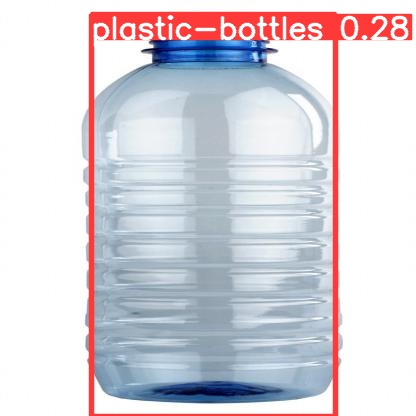

In [6]:
display.Image(filename="/content/yolov5/runs/detect/exp/000002_jpg.rf.a8b00452ca2b72a30b904f2ee7aecc9f.jpg", width=600)

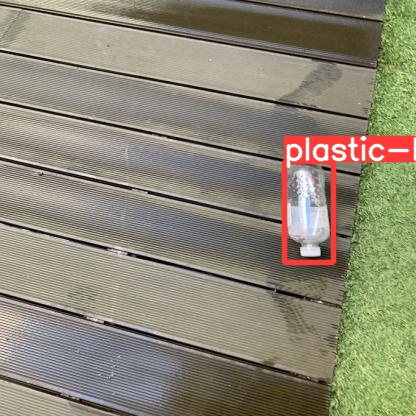

In [7]:
display.Image(filename="/content/yolov5/runs/detect/exp/PET1-035_jpg.rf.7163264b7f76b2bdf5492b86ef126781.jpg", width=600)

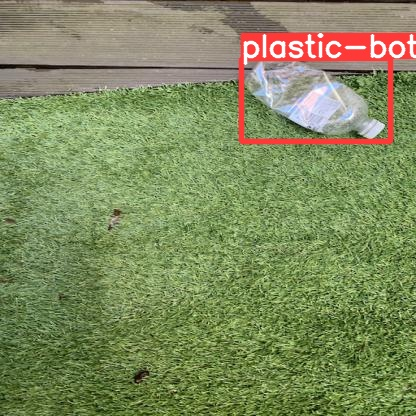

In [8]:
display.Image(filename="/content/yolov5/runs/detect/exp/PET1-142_jpg.rf.5bb99672cda80427c6ef40b056c8e0ff.jpg", width=600)

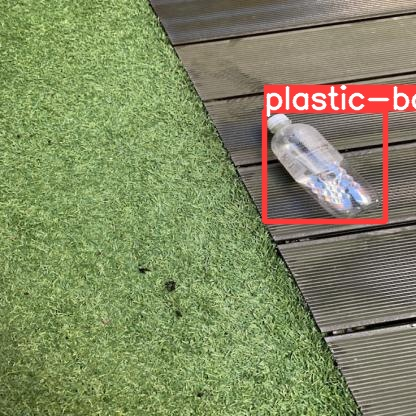

In [9]:
display.Image(filename="/content/yolov5/runs/detect/exp/PET1-055_jpg.rf.8331058fd959961c057e9cc96e215f7f.jpg", width=600)

# Metrics
Training results are automatically logged, by the Ultralytics script, with Tensorboard and CSV loggers to runs/train, with a new experiment directory created for each new training.\
This directory contains train and val statistics, mosaics, labels, predictions and augmented mosaics, as well as metrics and charts including precision-recall (PR) curves and confusion matrices.

### Confusion Matrix

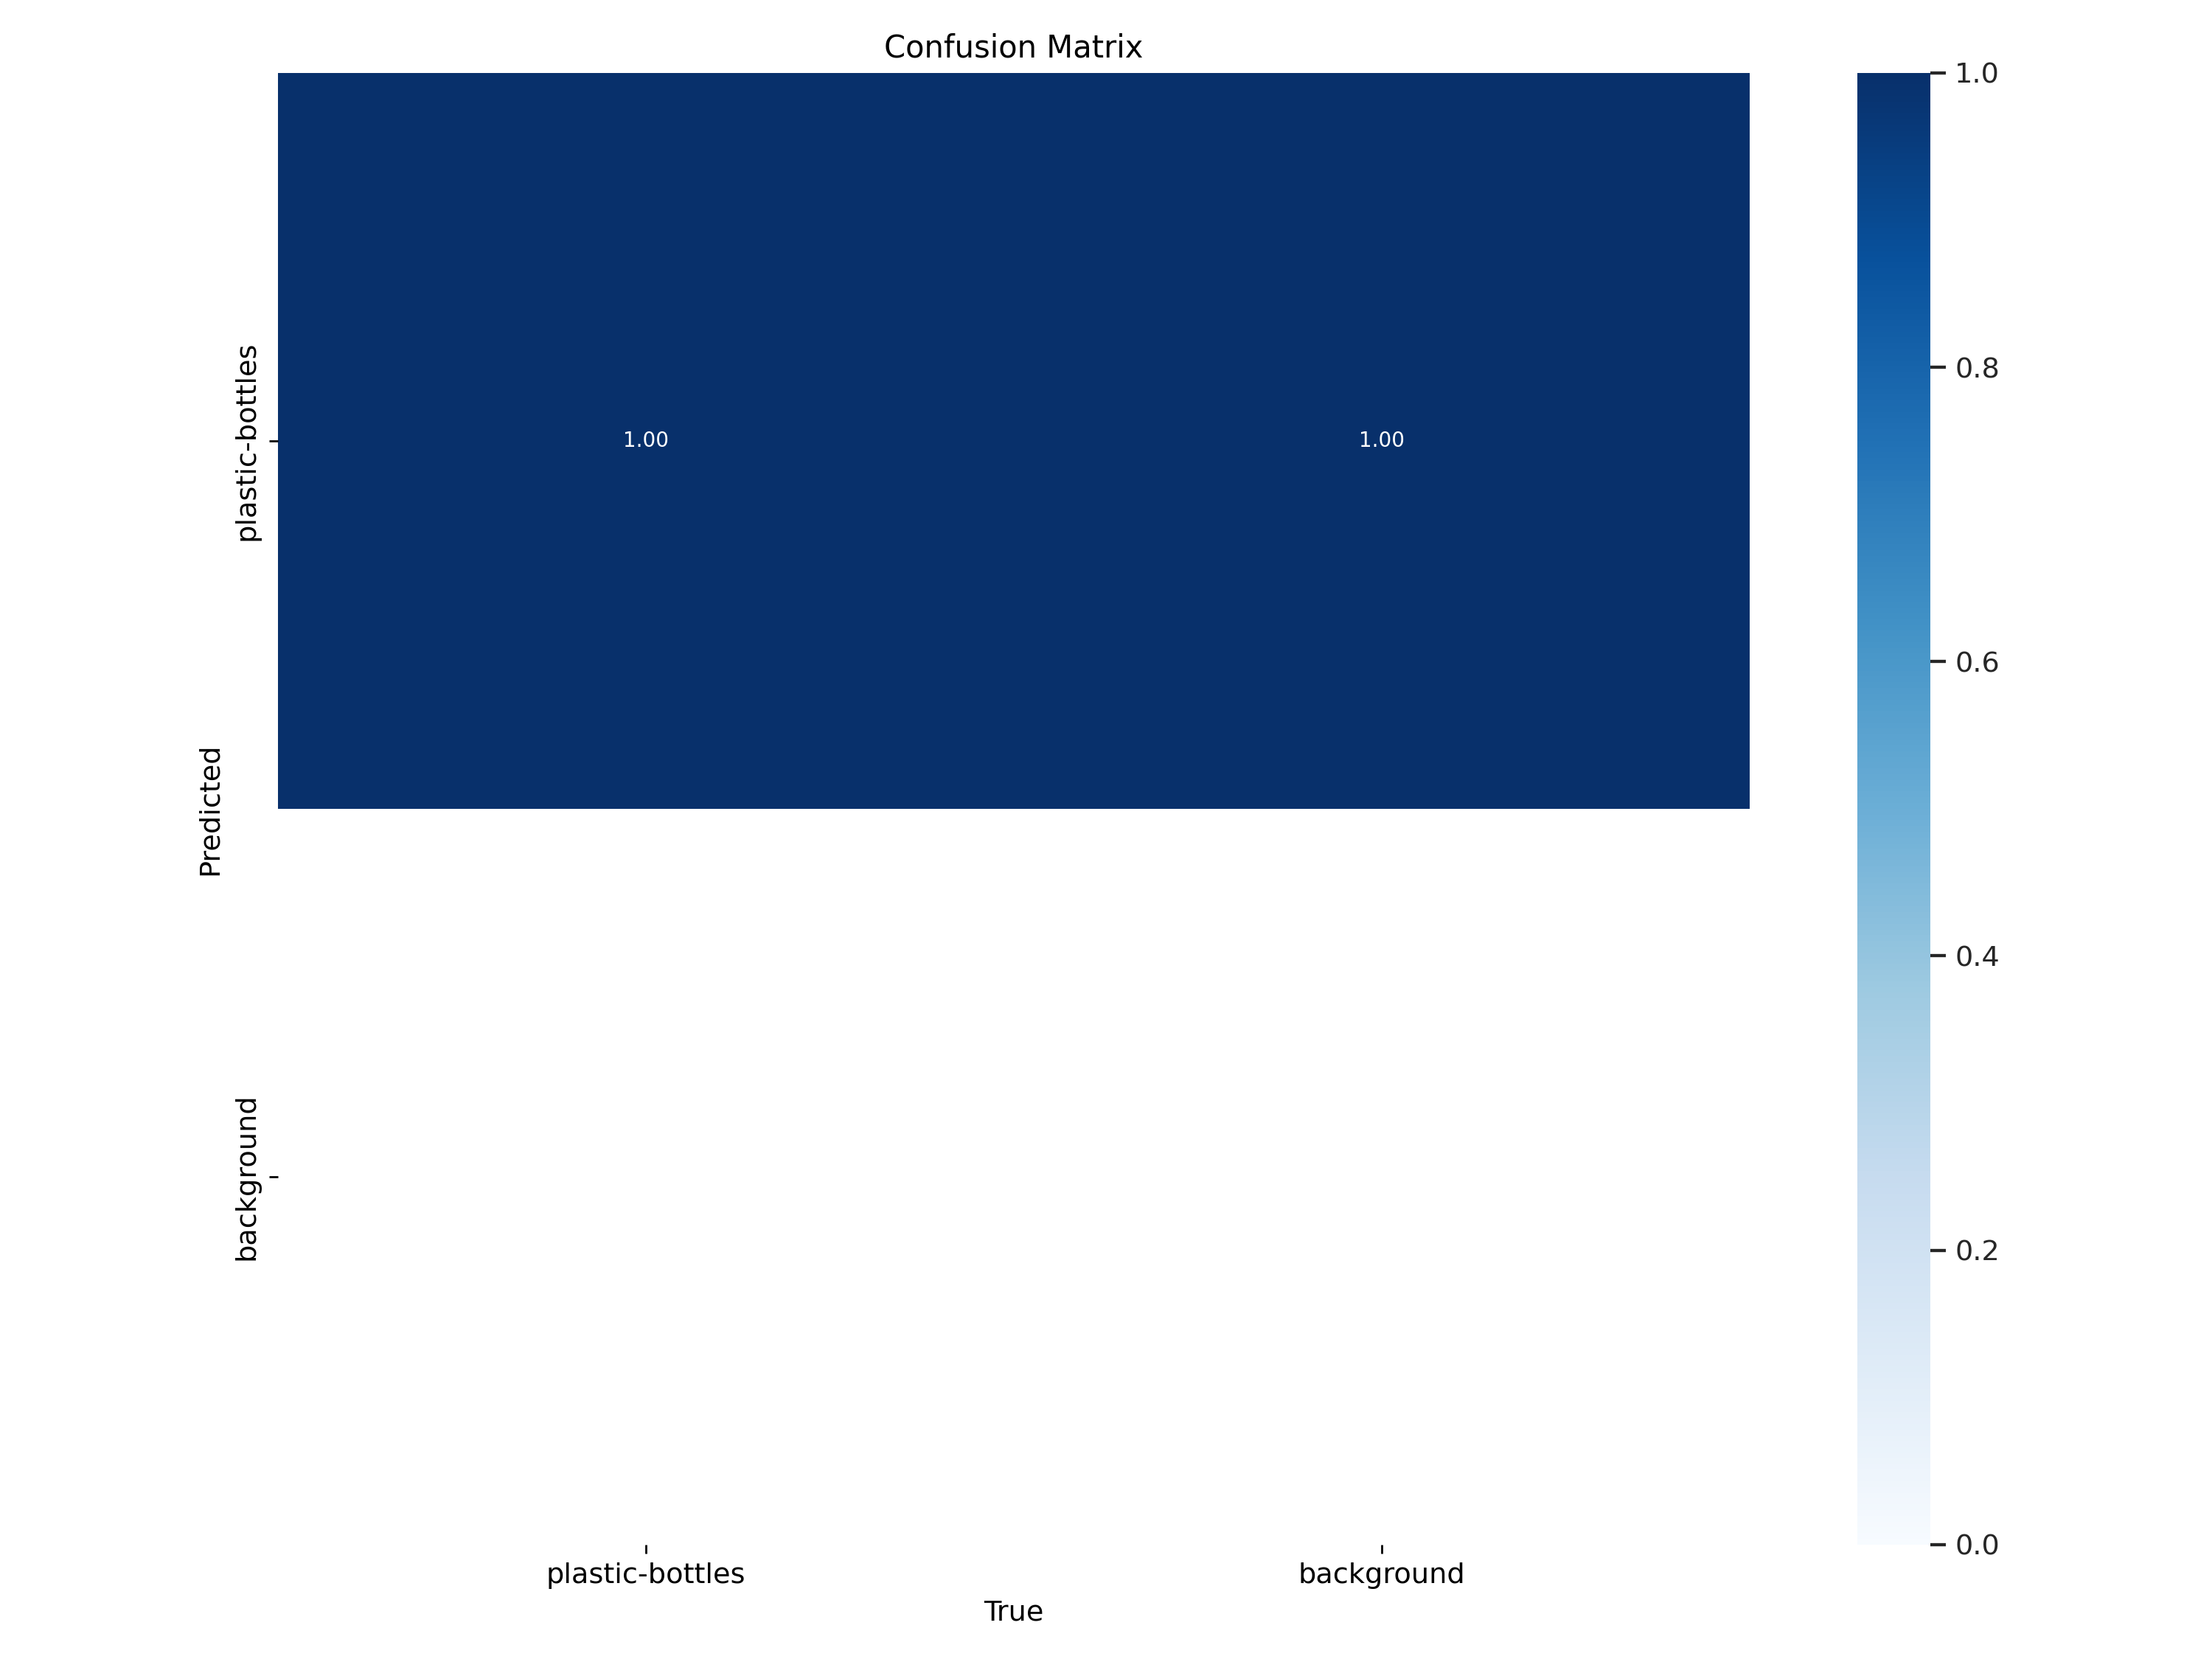

In [17]:
display.Image(filename="/content/yolov5/runs/val/exp/confusion_matrix.png", width=600)

### F1 Curve

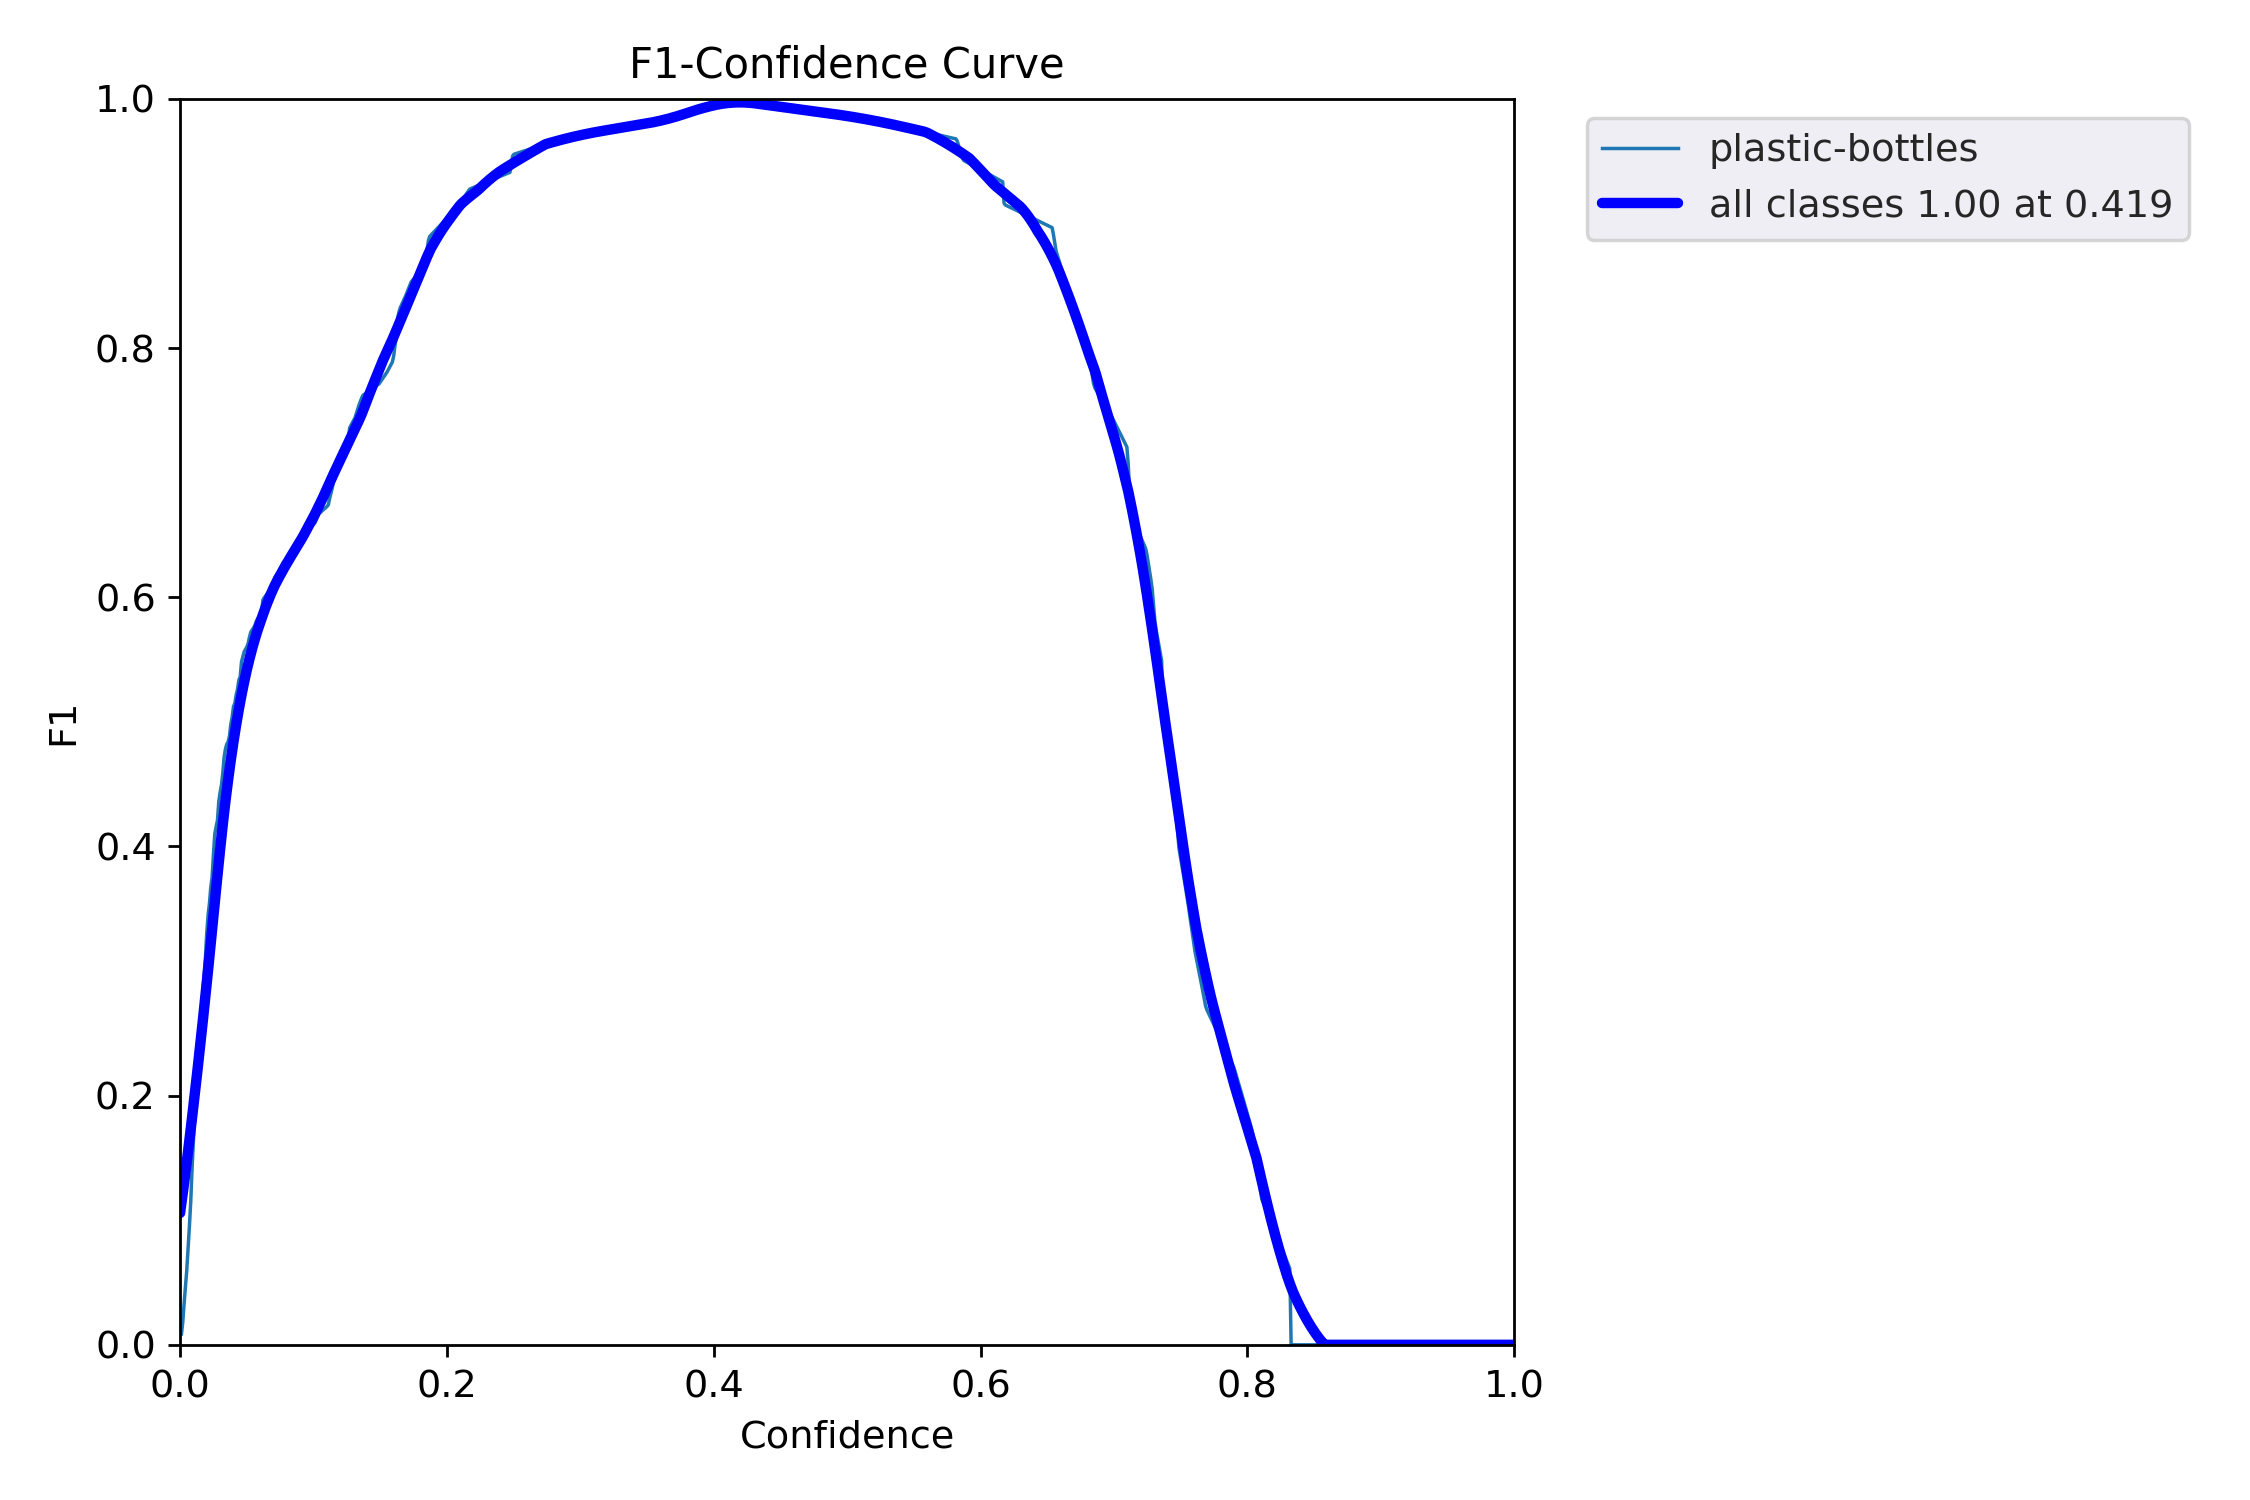

In [18]:
display.Image(filename="/content/yolov5/runs/val/exp/F1_curve.png", width=600)

### Results file results.csv is updated after each epoch, and then plotted as results.png (below) after training completes.

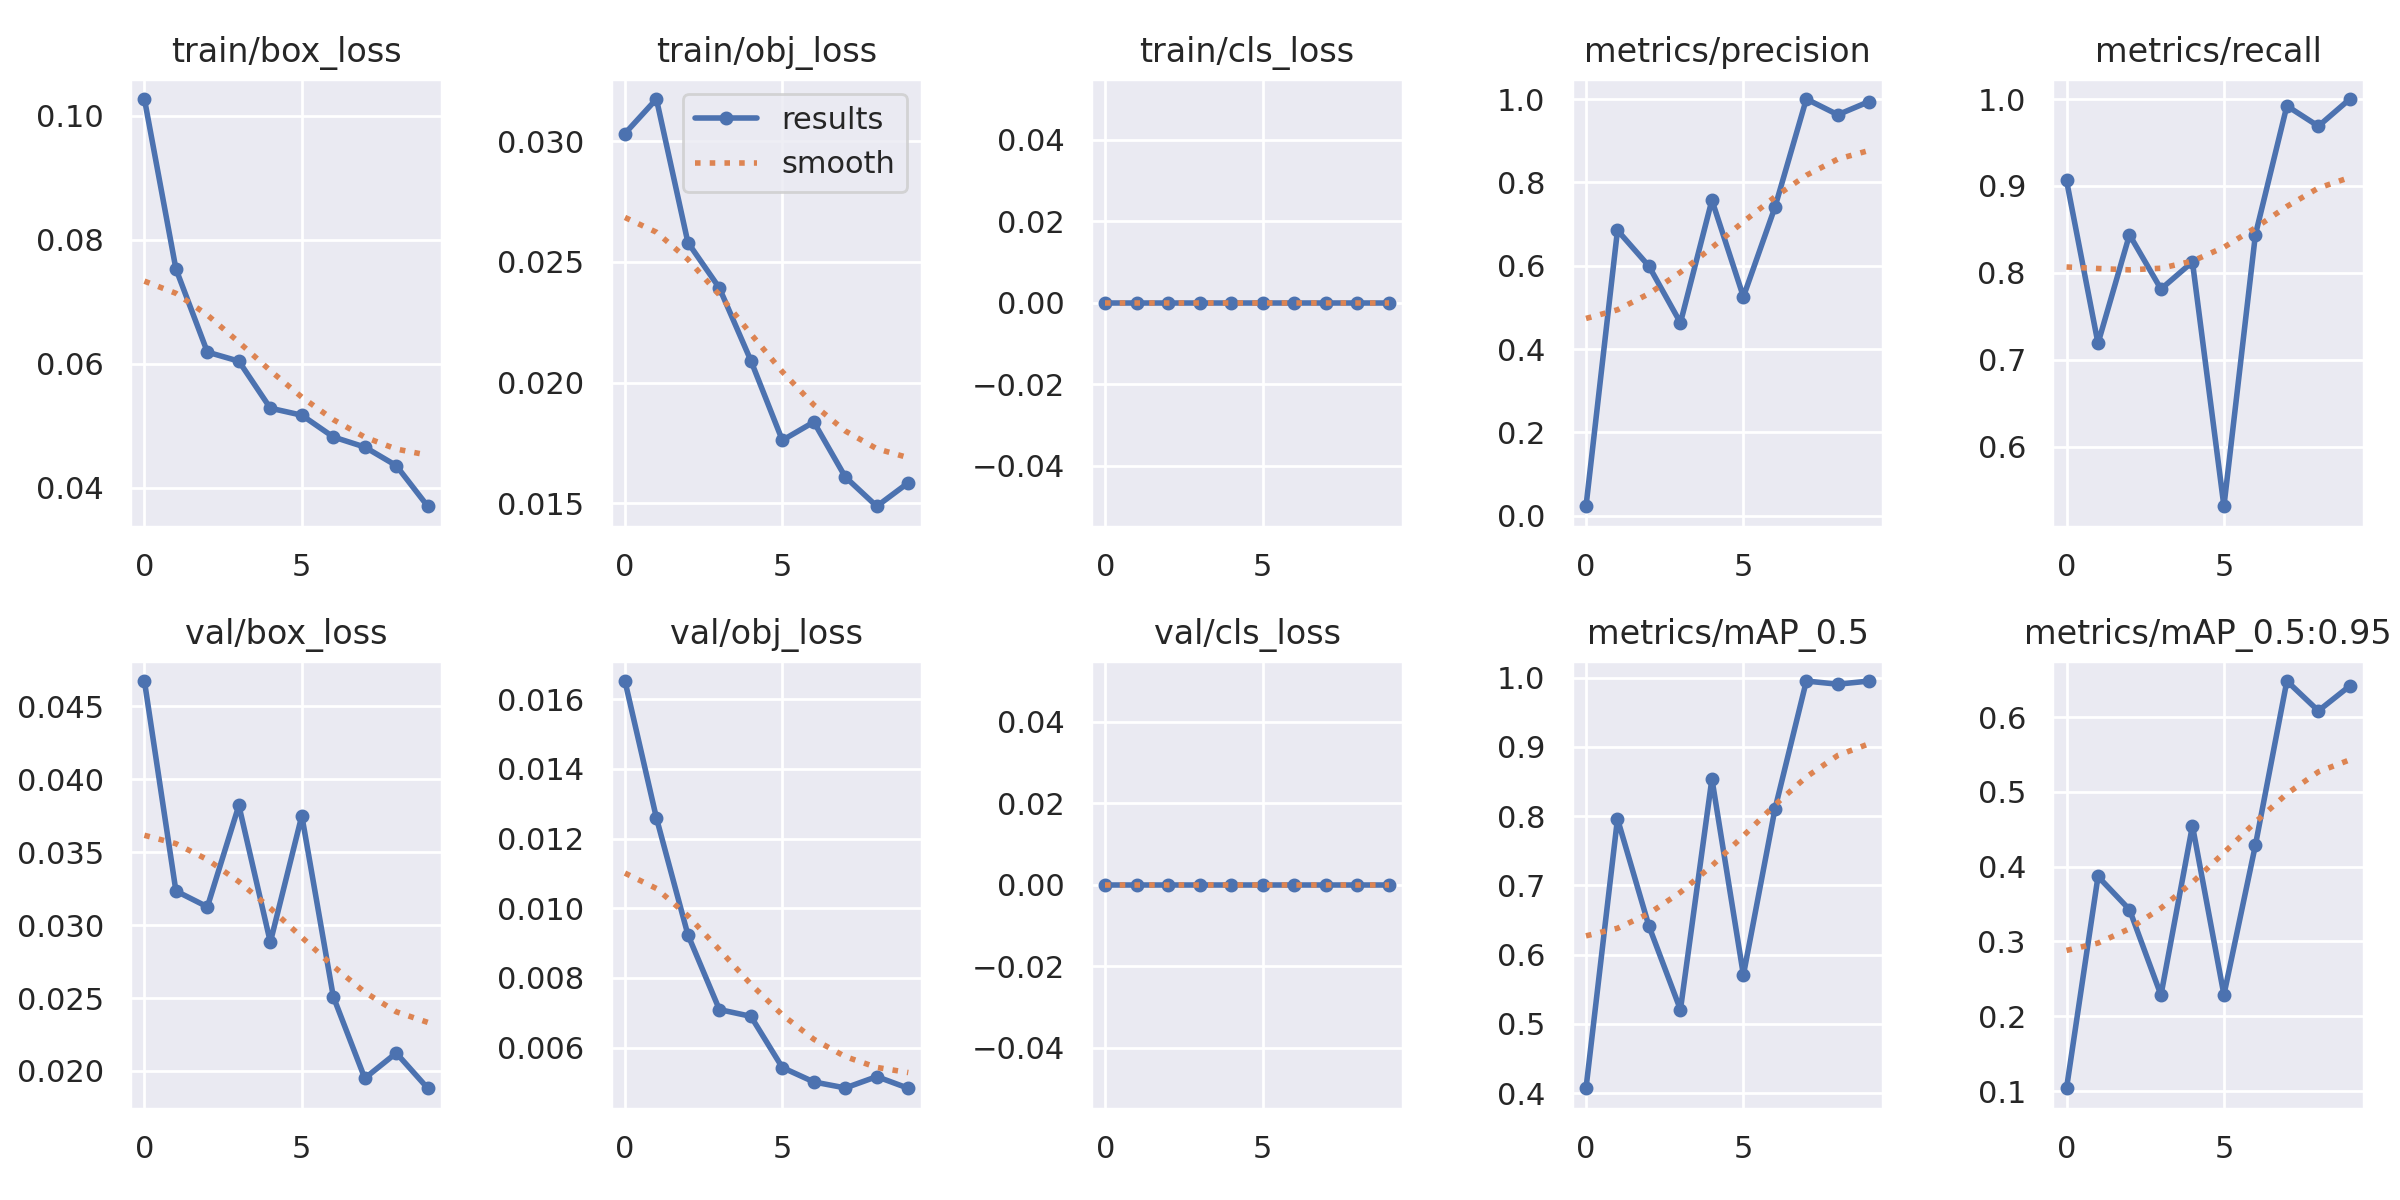

In [12]:
display.Image(filename="/content/yolov5/runs/train/exp/results.png", width=600)

# Training with no weights
This is an experiment to understand the difference of training with or without pre-trained weights, but we have to consider that to actually train from scratch, YOLO expects a very large dataset, trained for a long time:

- Images per class: ≥ 1500 images per class recommended
- Instances per class: ≥ 10000instances (labeled objects) per class recommended
- Image variety: Must be representative of the deployed environment.

We also experimented with a higher number of epochs, but the model did not
improve after 40 epochs.




In [13]:
!python train.py --batch 5 --epochs 25 --data "/content/drive/MyDrive/Tiny_PlasticBottles/data.yaml" --weights '' --cfg yolov5m.yaml --img 28

train: weights=, cfg=yolov5m.yaml, data=/content/drive/MyDrive/Tiny_PlasticBottles/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=5, imgsz=28, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma

In [14]:
!python val.py --weights '/content/yolov5/runs/train/exp2/weights/best.pt' --data "/content/drive/MyDrive/Tiny_PlasticBottles/data.yaml" --img 28 --half

val: data=/content/drive/MyDrive/Tiny_PlasticBottles/data.yaml, weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=28, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
WARNING ⚠️ --img-size 28 must be multiple of max stride 32, updating to 32
val: Scanning /content/drive/MyDrive/Tiny_PlasticBottles/valid/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100% 26/26 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.13it/s]
                   all         26         32   0.000801     0.0625 

In [15]:
!python detect.py --weights runs/train/exp2/weights/best.pt --source "/content/drive/MyDrive/Tiny_PlasticBottles/test/images"

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/Tiny_PlasticBottles/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/13 /content/drive/MyDrive/Tiny_PlasticBottles/test/images/000002_jpg.rf.a8b00452ca2b72a30b904f2ee7aecc9f.jpg: 640x640 1000 plastic-bottless, 27.2ms
image 2/13 /content/drive/MyDrive/Tiny_PlasticBottles/test/images/PET1-005_jpg.rf.990297e6c745e019b2449fa8f2356b7c.jpg: 640x640 1000 pl

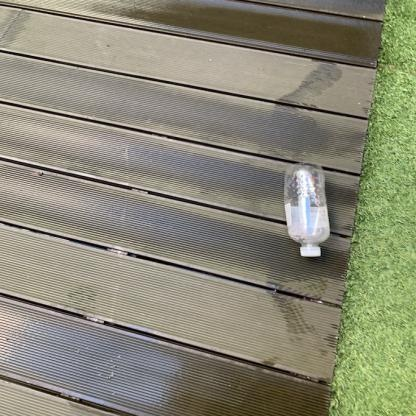

In [19]:
display.Image(filename="/content/yolov5/runs/detect/exp2/PET1-035_jpg.rf.7163264b7f76b2bdf5492b86ef126781.jpg", width=600)

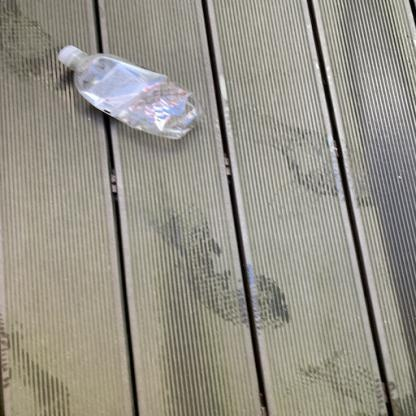

In [20]:
display.Image(filename="/content/yolov5/runs/detect/exp2/PET1-124_jpg.rf.ba258597690e71bcc00d72d44a2f8f64.jpg", width=600)

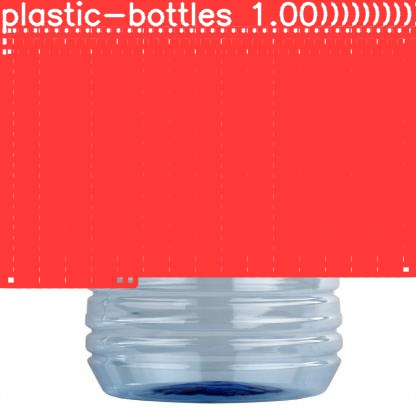

In [21]:
display.Image(filename="/content/yolov5/runs/detect/exp2/000002_jpg.rf.a8b00452ca2b72a30b904f2ee7aecc9f.jpg", width=600)

# Metrics

### Confusion Matrix

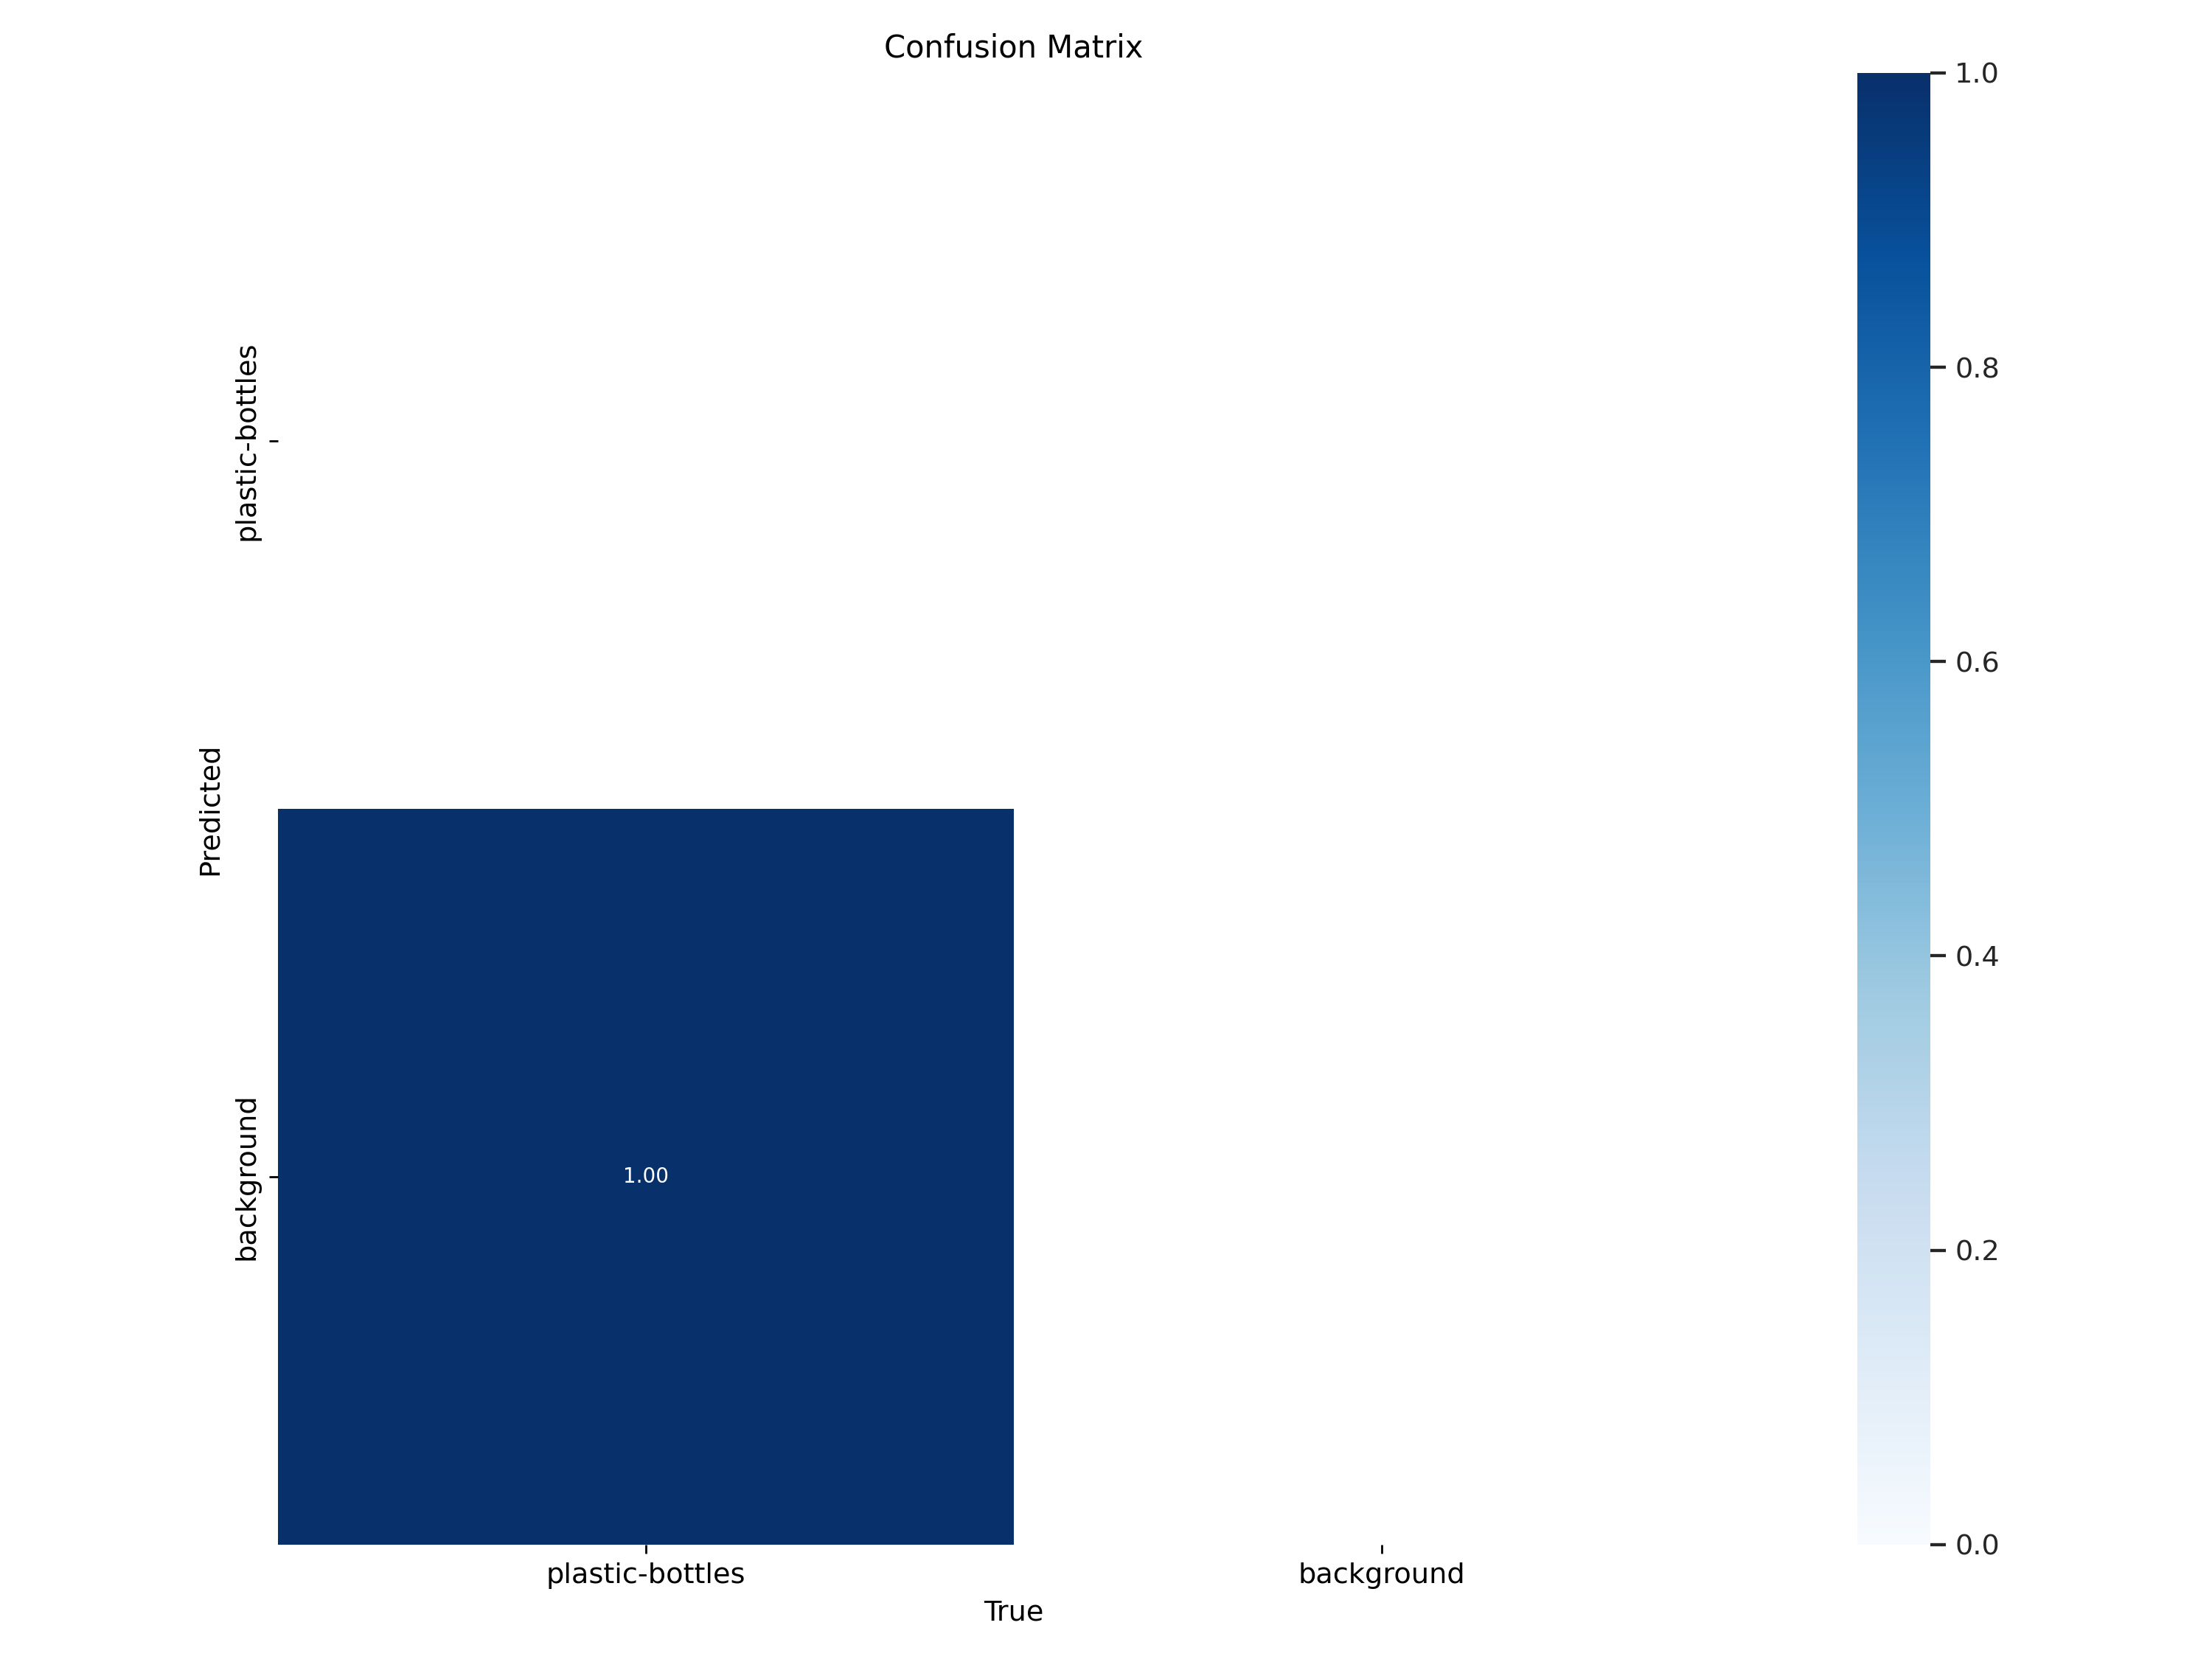

In [23]:
display.Image(filename="/content/yolov5/runs/val/exp2/confusion_matrix.png", width=600)

### F1 curve

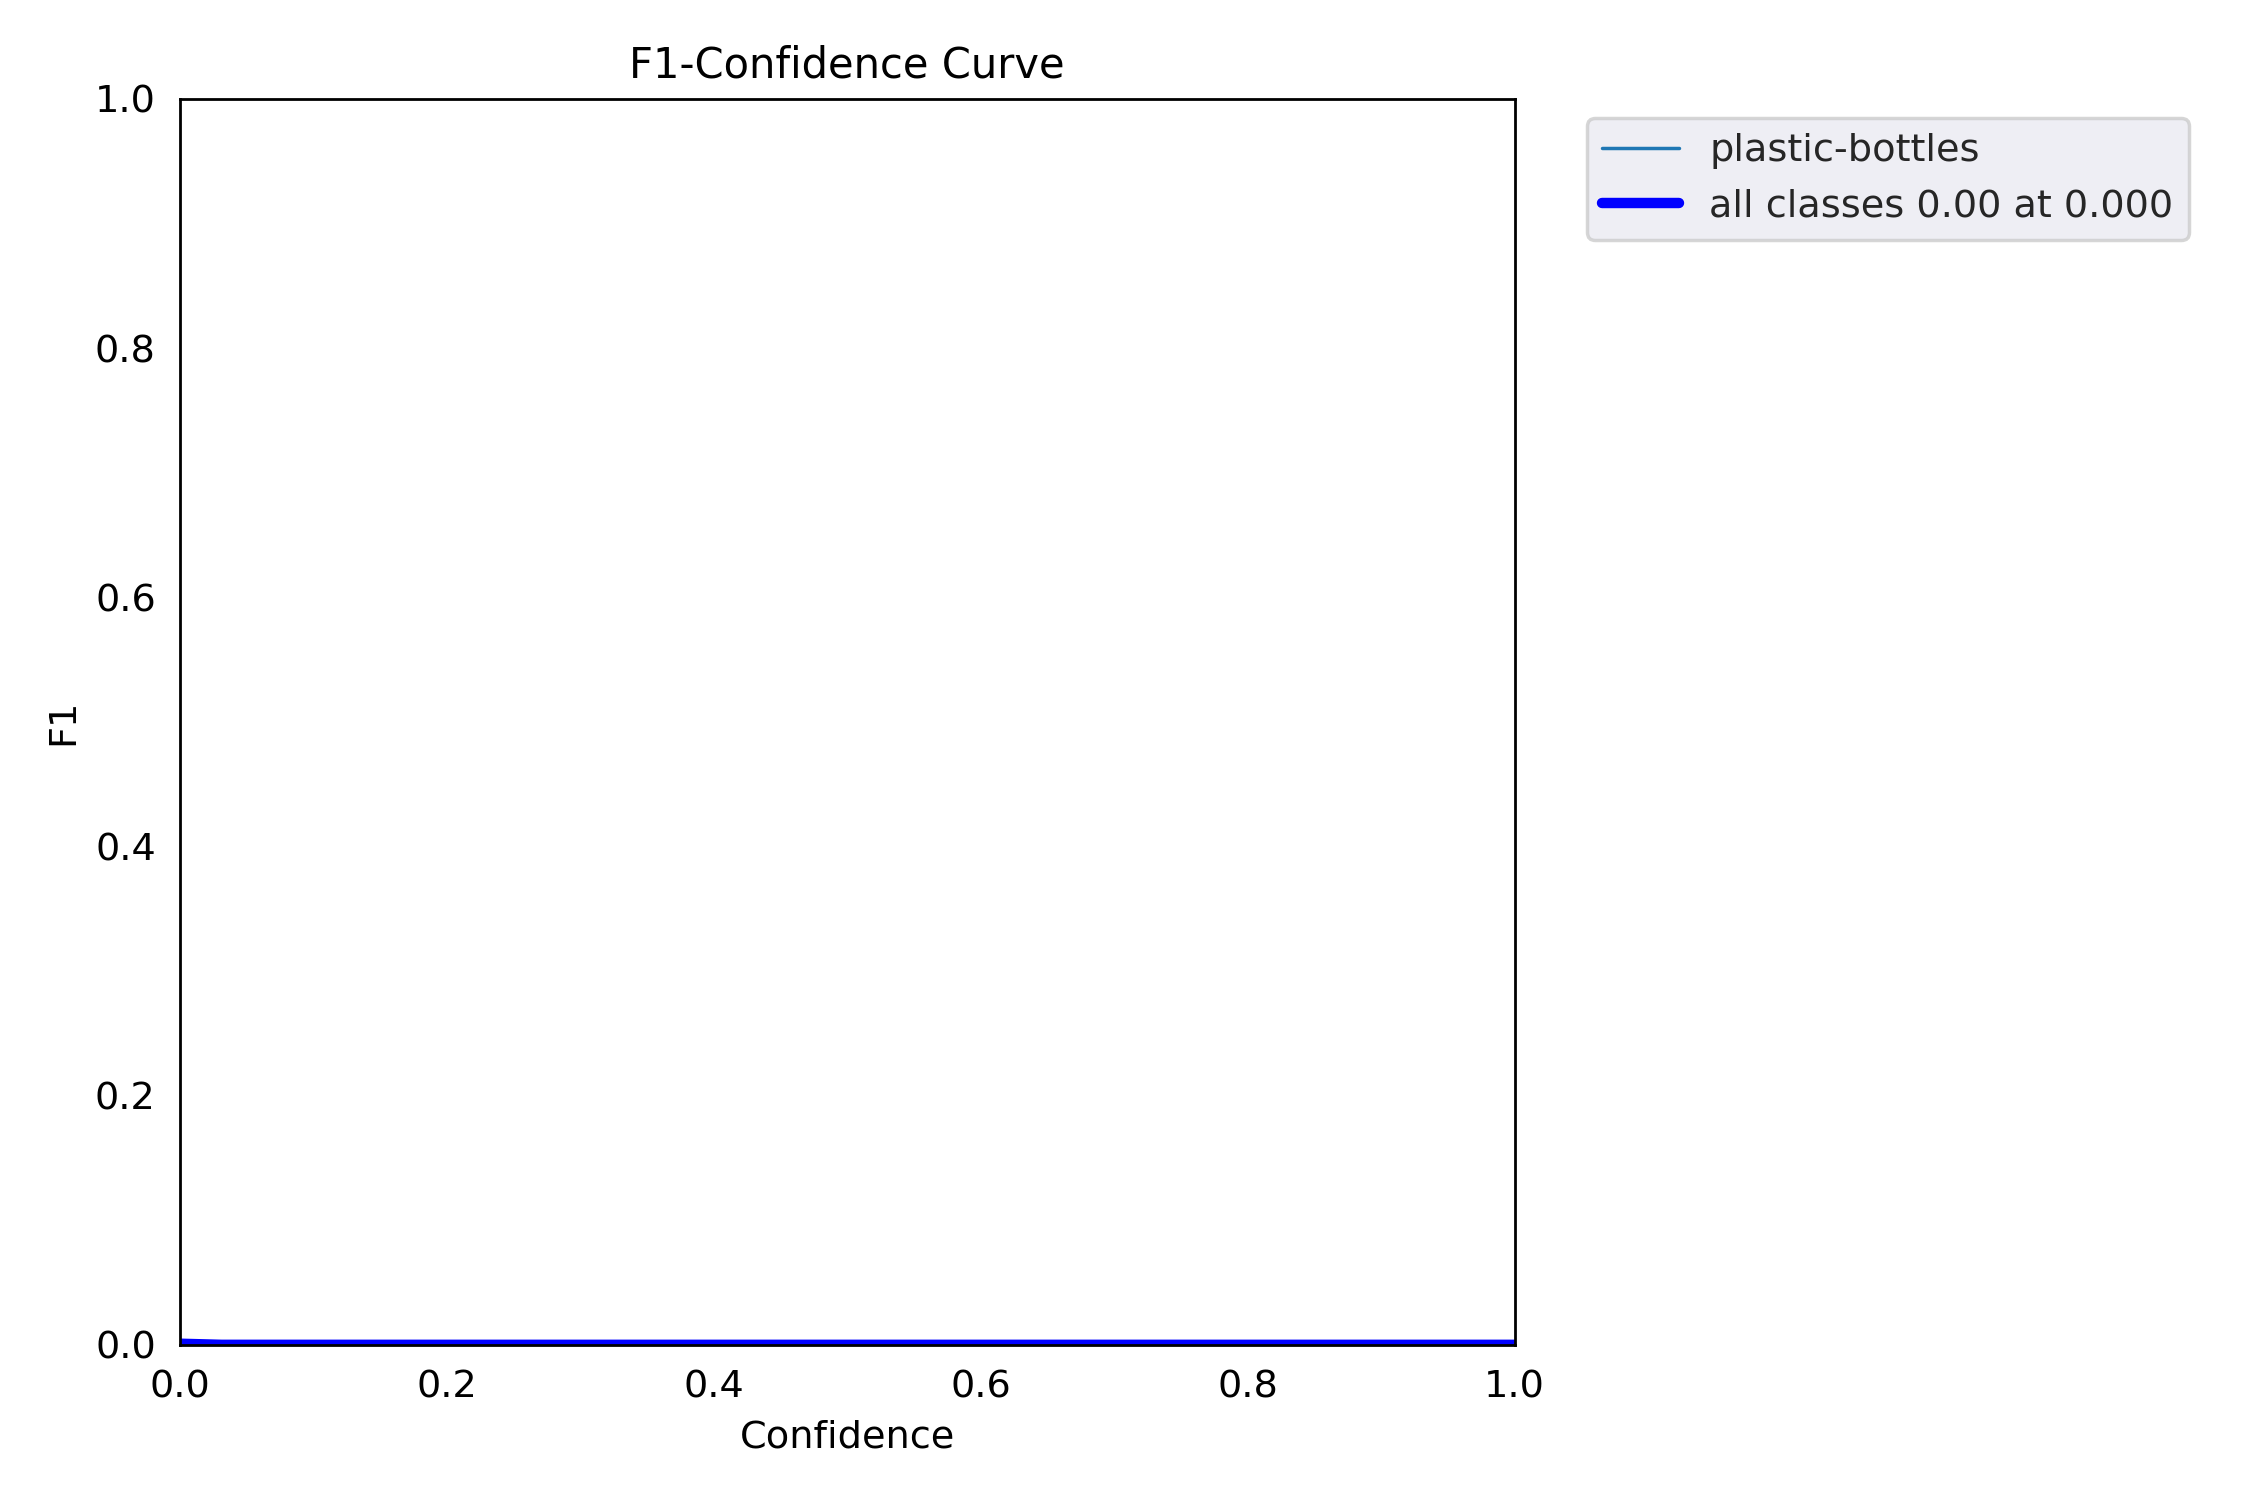

In [24]:
display.Image(filename="/content/yolov5/runs/val/exp2/F1_curve.png", width=600)

### Results

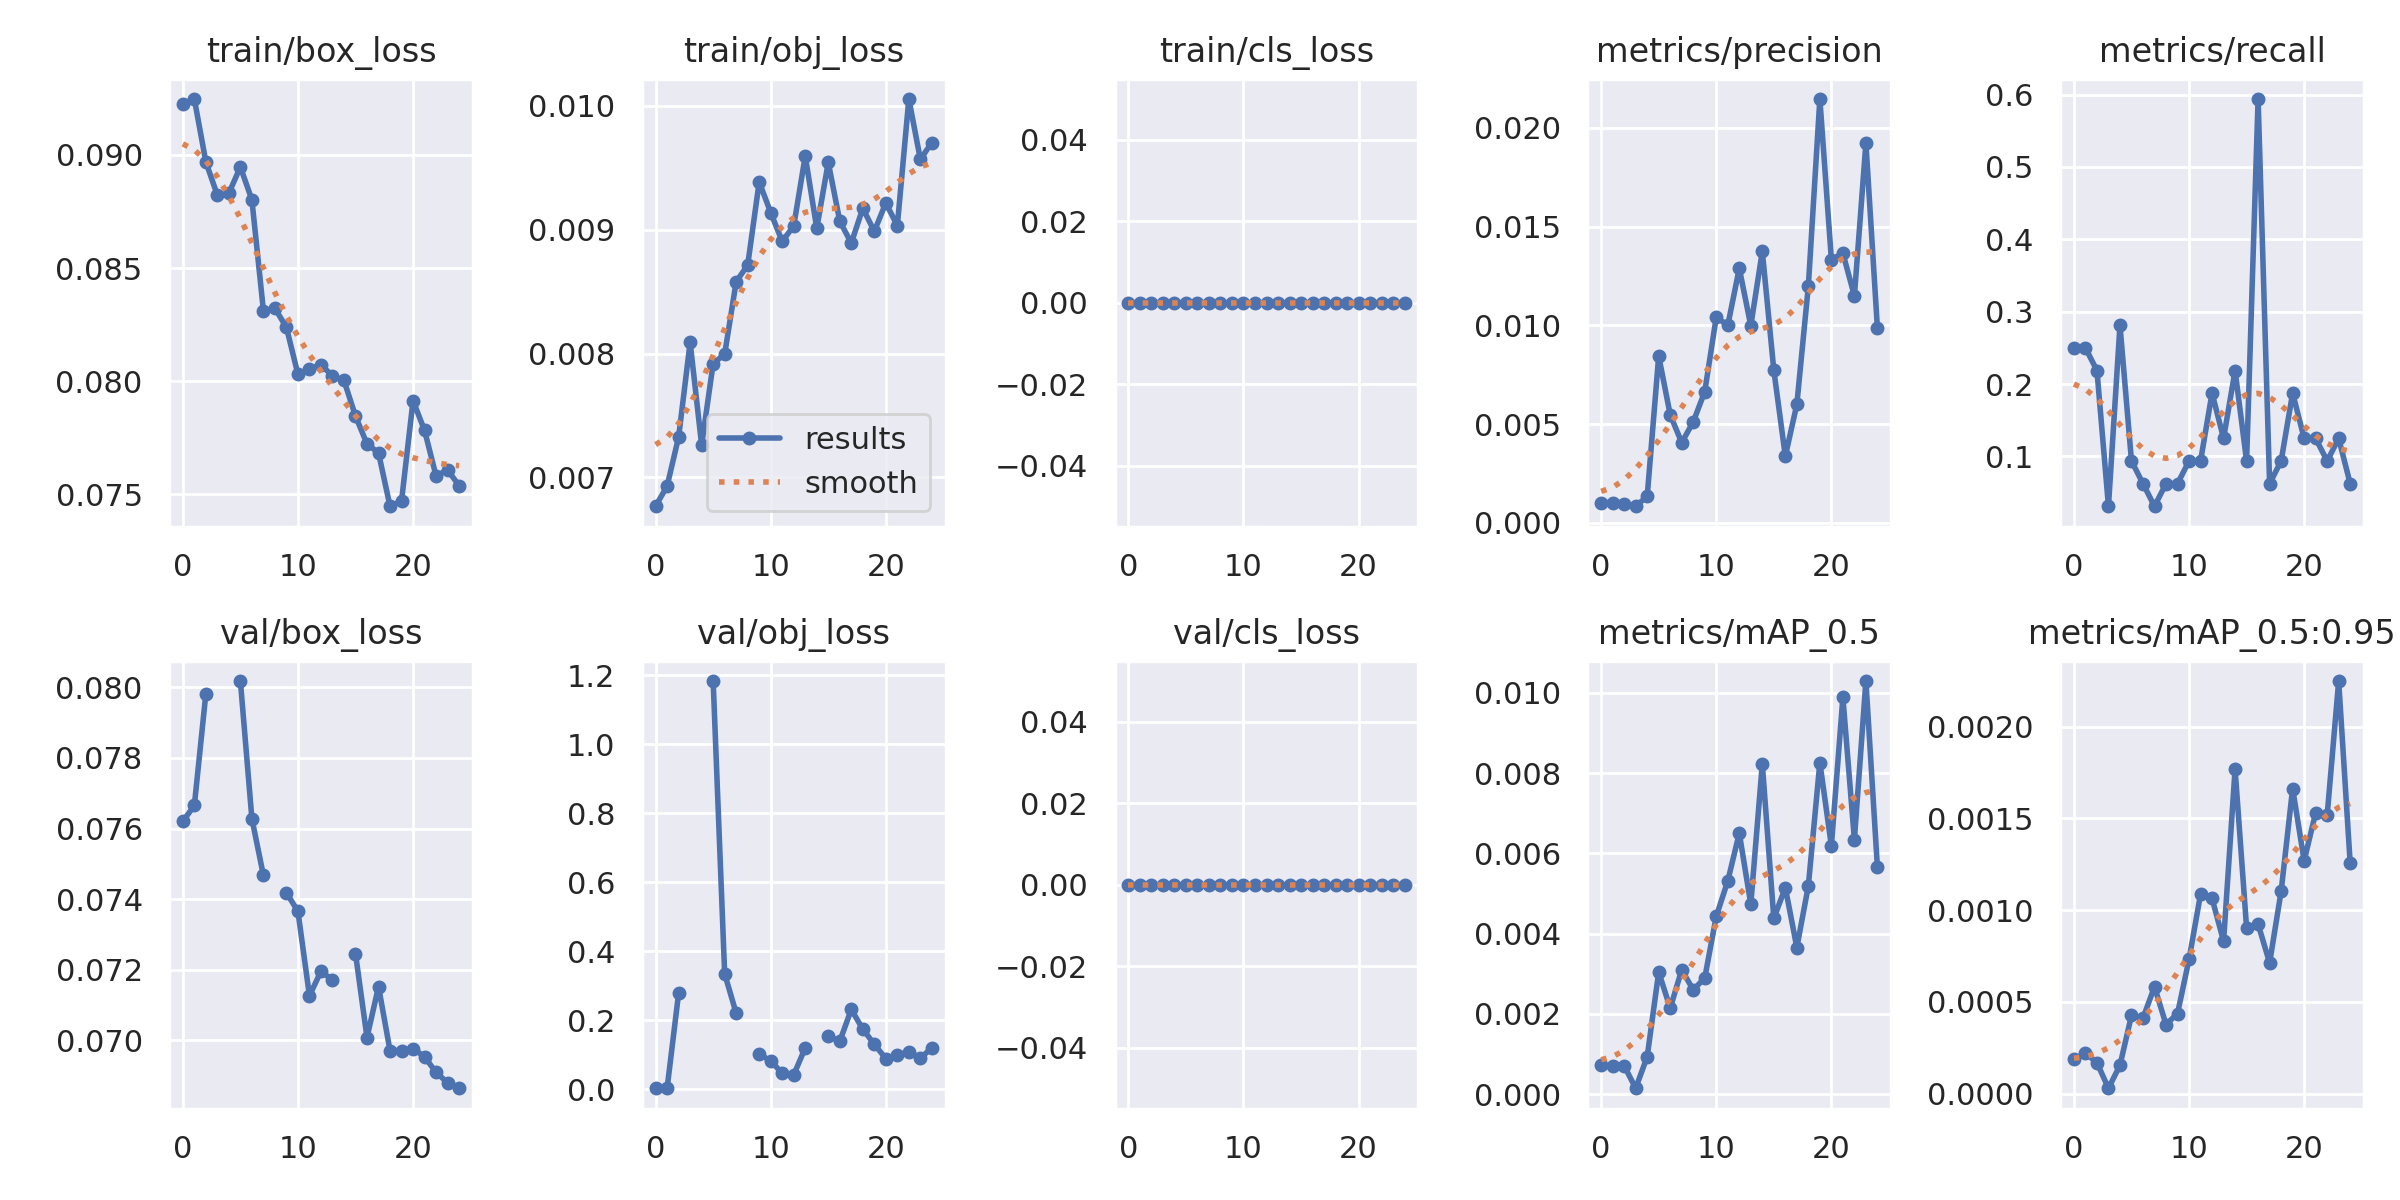

In [26]:
display.Image(filename="/content/yolov5/runs/train/exp2/results.png", width=600)